In [2]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

return_X_y=True: This parameter ensures that the function returns the feature matrix (X) and the target values (y) separately, instead of returning the dataset in a dictionary format.

X: The feature matrix (contains 442 rows and 10 columns in this case).
y: The target variable (a continuous variable representing the progression of diabetes).

In [4]:
X,y = load_diabetes(return_X_y=True)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [10]:
from sklearn.linear_model import Ridge

When to Use Cholesky Solver:
When the dataset is relatively small or medium-sized and the matrix involved is symmetric positive-definite, the Cholesky decomposition is a great option for faster computation.
For larger datasets, however, other solvers like sag, saga, or auto may be preferable due to their scalability.\
Cholesky solver is a fast and efficient way to solve the Ridge regression problem when the matrix is symmetric and the dataset is of small to medium size.












In [12]:
reg = Ridge(alpha=0.1, solver='cholesky')

In [16]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [18]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.46931288533098026

In [20]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


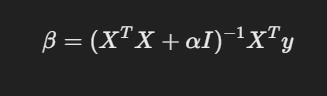

In [44]:
class MeraRidge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.coef_=None
        self.intercept_=None
        
        
    def fit(self,X_train,y_train):
       """This line inserts a column of ones as the first column in X_train. 
       This is done to account for the intercept (bias term) in the model.
       Without this column of ones, the model would assume there is no intercept term and 
       would only calculate the coefficients for the features x1,x2,....,xn.
       """
       X_train = np.insert(X_train,0,1,axis=1) # x_train k first col me 1 dalenge
       """Here, an identity matrix I is created. The size of the identity matrix matches 
       the number of columns in X_train, which includes both the features and the bias (intercept) term.
       The identity matrix is used for regularization in Ridge regression. 
       The diagonal entries of the matrix will be used to penalize the size of the coefficients."""
       I = np.identity(X_train.shape[1])
       I[0][0] = 0
       result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
       self.intercept_ = result[0]
       self.coef_ = result[1:]
        
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [46]:

reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309806
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602813
